In [1]:
%matplotlib widget
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_constructor import DataConstructor
from modules.data_visualizer import DataVisualizer
from modules.data_clustering import DataClustering
from modules.data_processing import DataProcessor
from modules.models import TimePeriod, PreprocessingParams, DiffParams

## Constructing data
- Fetching from database
- Filling gaps in data
- Log is taken

In [2]:
dc = DataConstructor()

time_period = TimePeriod(dt_from=dt.datetime(2022, 1, 1), dt_to=dt.datetime(2023, 1, 1))
proc_params = PreprocessingParams(diff=DiffParams(is_true=False), std=False)

df, tickers = dc.construct_df(time_period, preprocessing_params=proc_params, filter_stablecoins=True)

Constructing dataframe: 100%|██████████| 169/169 [04:35<00:00,  1.63s/it]


=== Log ===
=== Ordering tickers ===


Calculating variance for each ticker: 100%|██████████| 6/6 [01:21<00:00, 13.64s/it]


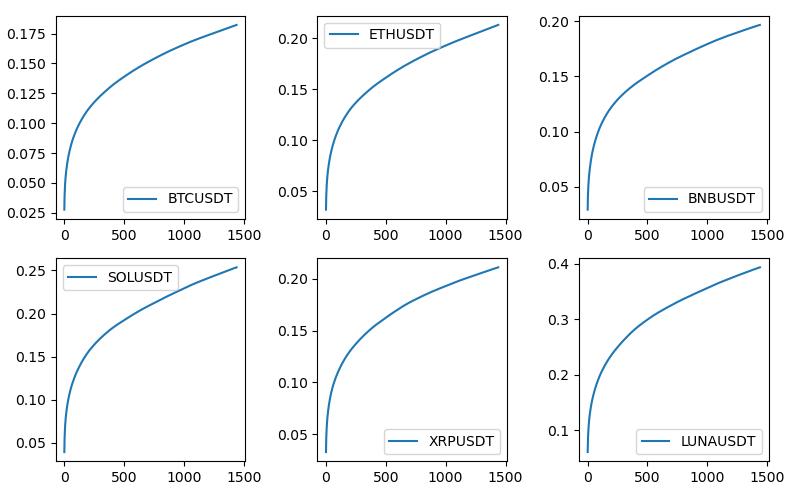

In [6]:
selected_tickers = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'SOLUSDT', 'XRPUSDT', 'LUNAUSDT']
period_from = 1
period_to = 24 * 60

ticker_variance_dict = DataProcessor.calc_derivative_variance_over_steps(df, selected_tickers, period_from, period_to)

DataVisualizer.plot_derivative_variance(ticker_variance_dict, period_from, period_to)

Calculating PCA for each diff period: 100%|██████████| 1439/1439 [03:44<00:00,  6.42it/s]


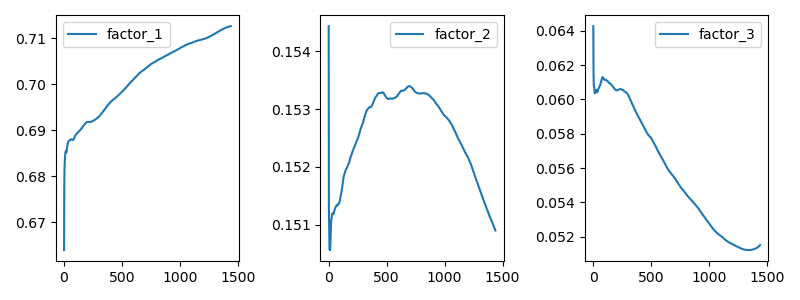

In [11]:
selected_tickers = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'SOLUSDT', 'XRPUSDT', 'LUNAUSDT']
period_from = 1
period_to = 24 * 60

dict_variance_list = DataProcessor.calc_derivative_pca_over_steps(df, selected_tickers, period_from, period_to)

DataVisualizer.plot_derivative_pca_variance(dict_variance_list)

Calculating PCA for each diff period: 100%|██████████| 1439/1439 [3:13:08<00:00,  8.05s/it] 


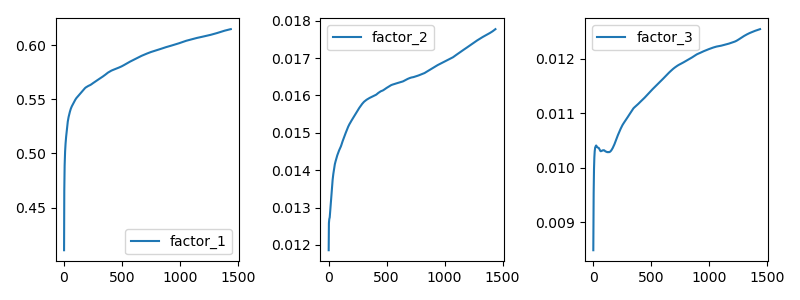

In [8]:
period_from = 1
period_to = 24 * 60

dict_variance_list = DataProcessor.calc_derivative_pca_over_steps(df, tickers, period_from, period_to)

DataVisualizer.plot_derivative_pca_variance(dict_variance_list)